
## **Desafio 1 : Cosméticos**

**Contexto:**

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O Time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado. 

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de dados (desafio_01_cosmeticos.csv)  contendo as seguintes informações:

- id_produto: código identificador do produto, com a fórmula utilizada. Para diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3
- id_voluntária: código identificador da voluntária que utilizou o produto.
- durabilidade: quanto tempo o produto durou em horas.
- idade: idade da voluntária
- exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso contrário.

De posse dessas informações, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:


In [2]:
#### Importando os pacotes que serao utilizados nos desafios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from google.colab import drive ## conectar com o google drive para ler seus arquivos
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Antes de focarmos na primeira pergunta do desafio, vamos ler a base e entender as suas principais características

In [3]:
drive.mount('/content/drive') ### conectando com o google drive para ler os arquivos da núvem

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/WoMakers/BOOTCAMP/2023/Desafios/Files/desafio_01_cosmeticos_challenge_testehipoteses.csv") ### leitura da base

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [6]:
df.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.00000,300.00000,300.00000,300.00000,300.00000
mean,2.00000,150.50000,17.13333,36.88667,0.44000
std,0.81786,86.74676,10.94295,12.62584,0.49722
min,1.00000,1.00000,5.00000,18.00000,0.00000
25%,1.00000,75.75000,9.00000,26.00000,0.00000
50%,2.00000,150.50000,14.00000,36.00000,0.00000
75%,3.00000,225.25000,20.00000,48.00000,1.00000
max,3.00000,300.00000,48.00000,60.00000,1.00000


Ao rodar as funções info e describe percebemos que:
1. Todas as variáveis da base disponibilizada são numéricas. 
2. Temos um dataset dom 300 observações (de 300 voluntárias)
3. A idade média do estudo é de 36 anos, minima 18 anos e máxima 60 anos
4. Aproximadamente 50% da base teve exposição ao sol
5. A média de durabilidade é de 17.13 horas


## **Pergunta 1**: Existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes? 


---
 Para responder essa pergunta primeiramente vamos plotar a durabilidade por tipo de batom para uma análise visual e depois iremos realizar um teste de hipóteses


**1.1 Análise Visual**: 


---

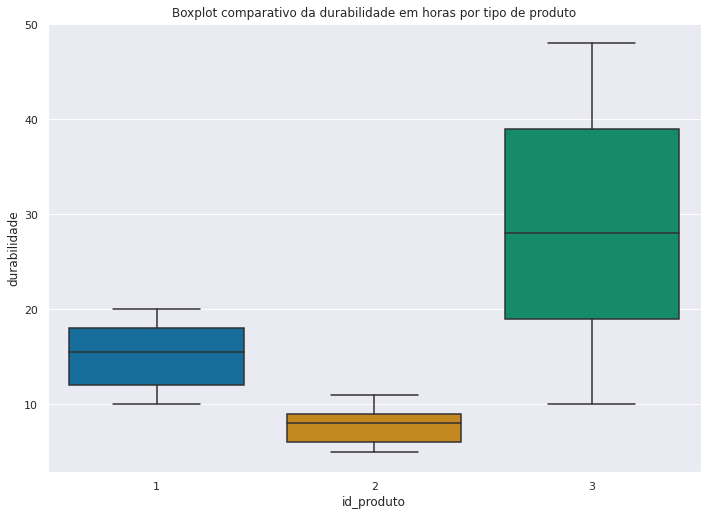

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="id_produto", y="durabilidade", data=df, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto")

Text(0.5, 1.0, 'Histograma comparativo da durabilidade em horas por tipo de produto')

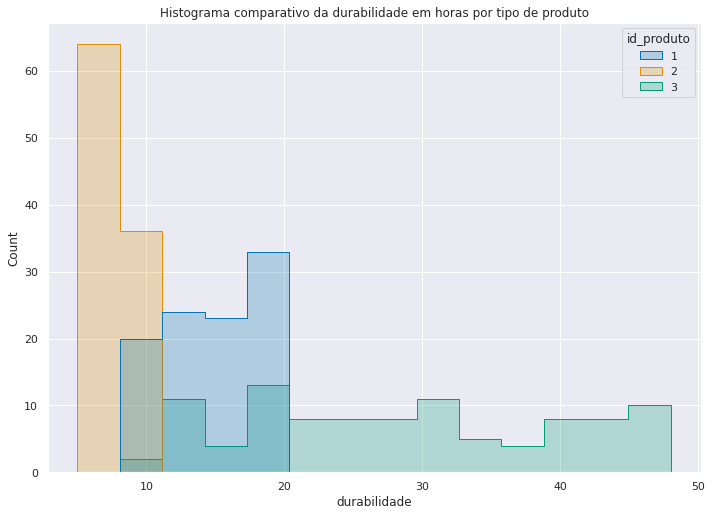

In [8]:
sns.histplot(data=df, x="durabilidade", hue="id_produto",  element="step", palette = "colorblind").set_title("Histograma comparativo da durabilidade em horas por tipo de produto")

Através dos gráficos acima, podemos ver que:
-  A durabilidade do produto 3 parece ser mais inconstante do que a dos outros produtos, apresentando maiores valores mínimos e máximos. 
- Porém a mediana do produto 3 é muito mais alta do que a de seus "concorrentes". Dessa forma, temos um produto que o consumidor médio ficaria mais satisfeito com a sua durabilidade, porém apresentaria uma menor consistência.
- As distribuições dos produtos apresentam formas bem distintas. visualmente o batom com fórmula 3 apresenta uma distribuição semelhante à uniforme. As outras distribuições, com fórmula 1 e 2 não parebem bem definidas.
- Nota-se uma assimetria forte no batom de fórmula 1


**1.2 Teste de Hipóteses**: 


---
O nosso objetivo é testar se a variável durabilidade é estatisticamente diferente para os tipos de fórmula mencionados.


Pela Análise visual anterior vimos que principalmente a fórmula 3 se diferencia muito das outras.

Para testar se a distribuição de durabilidade é estatisticamente diferente de acordo com cada uma das fórmulas apresentadas, podemos utilizar diferentes testes. 
Podemos utilizar testes comparativos de médias paramétricos (que verifiquem se as médias das diferentes fórmulas sao iguais) ou podemos usae testes não paramétricos, como o teste KS (Kolmogorov-Smirnov) 

O teste KS mede se duas distribuições sao estatisticamente diferentes umas das outras, por meio da distancia das distribuições cumulativas apresentadas. Se esses dados possuirem uma distancia grande na distribuicao cumulativa significa que vem de distribuicoes diferentes. 

Esse teste é MUITO utilizado para teste e monitoramento de variáveis, e para decisao de retreinar modelos de machine learning!

Conforme o gráfico abaixo ele vai comparar a distribuiçao de probabilidade cumumlativa de duas amostras, ou de uma amostra e uma distribuição conhecida.


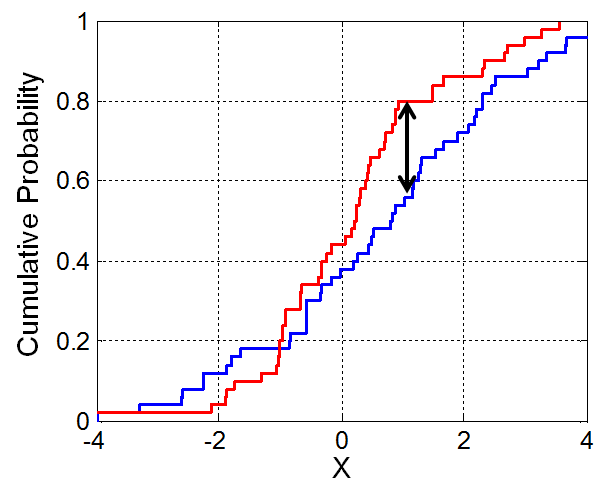

Na prática, quanto maior a distancia entra as distribuições cumulativas, então maior a probabilidade de as distribuicoes serem diferentes. 

A hipótese nula do teste é : Nao há diferenca entre as duas distribuicoes.
Entao nesse caso se o p-valor for < 0.05 as distribuicoes sao diferentes.

 Primeiro vamos armazenar a série da durabilidade de cada produto / fórmula

In [11]:
from scipy.stats import ks_2samp
## calcula a distribuicao cumulativa 
durabilidade_1 = df[df.id_produto == 1].durabilidade
durabilidade_2 = df[df.id_produto == 2].durabilidade
durabilidade_3 = df[df.id_produto == 3].durabilidade


Testando a durabilidade da fórmula 1 com a durabilidade da fórmula 2:

In [12]:
ks_2samp(durabilidade_1, durabilidade_2)

KstestResult(statistic=0.8, pvalue=3.5640292810890176e-32, statistic_location=11, statistic_sign=-1)

Como o p-valor do teste é menor do que 0.05, podemos inferir que durabilidade da formula 1 e 2 sao estatisticamente diferentes com 95% de confiança

In [13]:
ks_2samp(durabilidade_2, durabilidade_3)

KstestResult(statistic=0.98, pvalue=4.395433779467016e-55, statistic_location=11, statistic_sign=1)

In [14]:
ks_2samp(durabilidade_1, durabilidade_3)

KstestResult(statistic=0.7, pvalue=9.048888467758296e-24, statistic_location=20, statistic_sign=1)

O mesmo é valido comparando formula 1 com 3 e 2 com 3. Como o p-valor do teste é menor do que 0.05, podemos inferir sao estatisticamente diferentes com 95% de confiança

## **Pergunta 2**: Essa diferença persiste ou não quando a voluntária se expõe ao sol?  E com relação a idade?



---
 Para responder essa pergunta novamente proceder com a análise visual e posteriormente realizar o teste KS


**2.1 Análise Visual**: Exposicao ao Sol


---

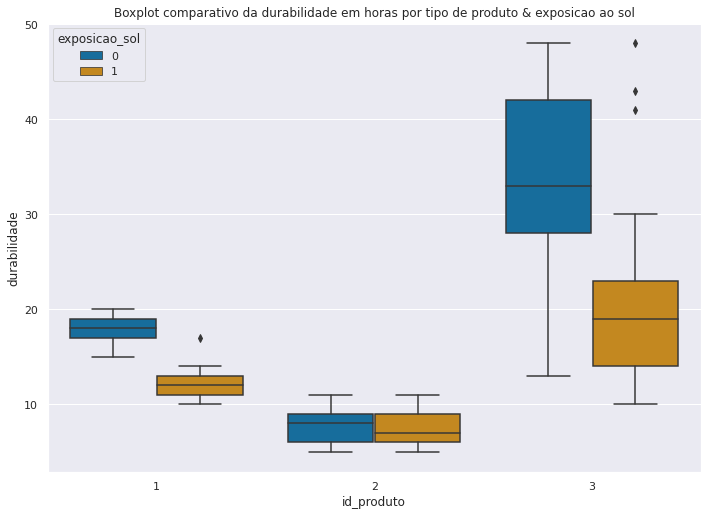

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="id_produto", y="durabilidade", hue = "exposicao_sol",data=df, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto & exposicao ao sol")

Pelo gráfico acima, notamos que para todos os casos, quando a voluntária se expos ao sol houve uma reducao na mediana da distribuiçao da durabilidade. Para alguns produtos, entretando, esse decrescimo foi maior do que para outros. No caso dos produtos 1 e 3 tivemos reduções mais expressivas

**2.2 Teste KS**: Exposicao ao Sol


---

In [19]:
durabilidade_1_exp_true = df[(df.id_produto == 1)&(df.exposicao_sol ==1)].durabilidade
durabilidade_2_exp_true = df[(df.id_produto == 2)&(df.exposicao_sol ==1)].durabilidade
durabilidade_3_exp_true = df[(df.id_produto == 3)&(df.exposicao_sol ==1)].durabilidade

In [20]:
ks_2samp(durabilidade_1_exp_true, durabilidade_2_exp_true)

KstestResult(statistic=0.8333333333333334, pvalue=2.6202928286549403e-17, statistic_location=9, statistic_sign=-1)

In [21]:
ks_2samp(durabilidade_2_exp_true, durabilidade_3_exp_true)

KstestResult(statistic=0.9487179487179487, pvalue=8.988577494522911e-22, statistic_location=11, statistic_sign=1)

In [22]:
ks_2samp(durabilidade_1_exp_true, durabilidade_3_exp_true)

KstestResult(statistic=0.6957264957264957, pvalue=2.7195930012302357e-10, statistic_location=14, statistic_sign=1)

Conclusao: A diferença na durabilidade dos batons de diferentes fórmulas persiste, mesmo com exposicao ao sol

**2.3 Análise Visual**: idade


---

Para analisar idade, podemos agregar tal variável em faixas etárias. Tal agregacao pode ser definida com base na distribuicao dos dados, ou até mesmo no ponto de vista de negócio


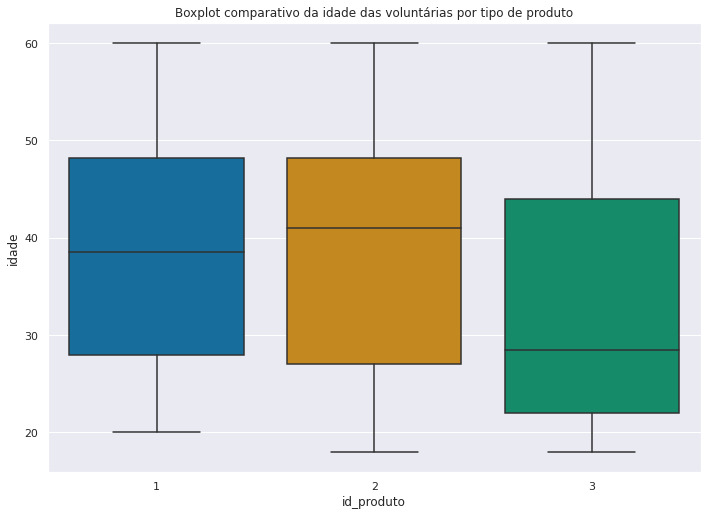

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="id_produto", y="idade", data=df, palette = "colorblind").set_title("Boxplot comparativo da idade das voluntárias por tipo de produto")

Podemos perceber que o produto 2 tem uma mediana de idade maior do que os outros, próximo aos 40 anos, já o produto 3 tem uma mediana de idade inferior a 30 anos.

Vamos também analisar o gráfico de dispersao dessas variáveis por produto

<Axes: xlabel='idade', ylabel='durabilidade'>

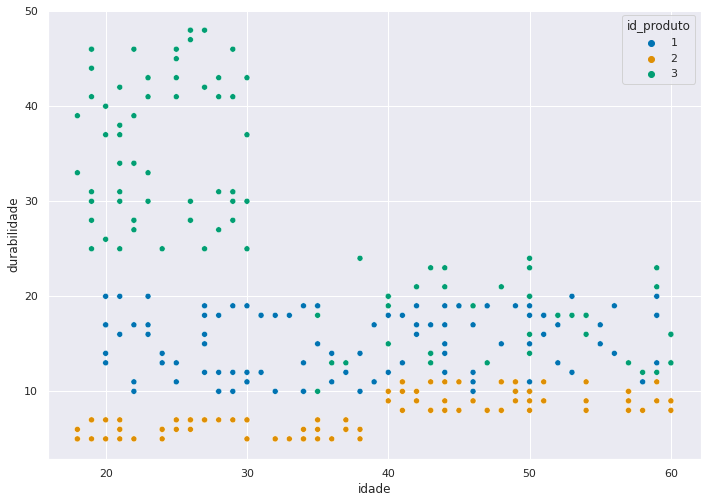

In [27]:
sns.scatterplot(data=df, x="idade", y="durabilidade", hue="id_produto",  palette = "colorblind")

Já pela análise do scatterplot, ou gráfico de dispersão, podemos ver que 

1. Para o produto 1: idade nao parece impactar na durabilidade
2. Para o produto 2: a partir dos 40 anos vemos um aumento do patamar da durabilidade, ou seja, a durabilidade do produto parece ser melhor para esse público.
3. Para o produto 3: até os 30 anos o produto parece ter uma durabilidade maior. Para faixas de idade maiores a durabilidade em horas fica abaixo de 30.

Ou seja, pela análise visual, recomendariamos o produto 2 para mulheres acima dos 40 anos e para o produto 3 recomendariamos o produto para mulheres até 40 anos. 

A suposicao inicial é de que o produto 2 deve conter algum composto anti-aging na sua fórmula

Dada a análise exploratória vamos agora definir as categorias de idade da seguinte forma:

- Até 30 anos
- De 30 a 40 anos
- De 40 a 50 anos
- Mais de 50 anos

In [32]:
### A funcao abaixo irá ser aplicada em cada uma das linhas do dataframe para categorizar a faixa etária
def categoria_idade(row):
  if(row['idade']<=30):
    return "Ate_30_anos"
  elif((row['idade']>30)&(row['idade']<=40)):
    return "De_31_a_40_anos"
  elif((row['idade']>40)&(row['idade']<=50)):
    return "De_41_a_50_anos"
  elif(row['idade']>50):
    return "Mais_de_50_anos"

In [33]:
### aplicando a função criada
df["faixa_etaria"] = df.apply(categoria_idade, axis =1)

In [35]:
### observando a quantidade de voluntárias em cada uma das faixas de idade
df["faixa_etaria"].value_counts()

Ate_30_anos        124
De_41_a_50_anos     78
De_31_a_40_anos     49
Mais_de_50_anos     49
Name: faixa_etaria, dtype: int64

Analisando o boxplot da durabilidade por produto e faixa etária

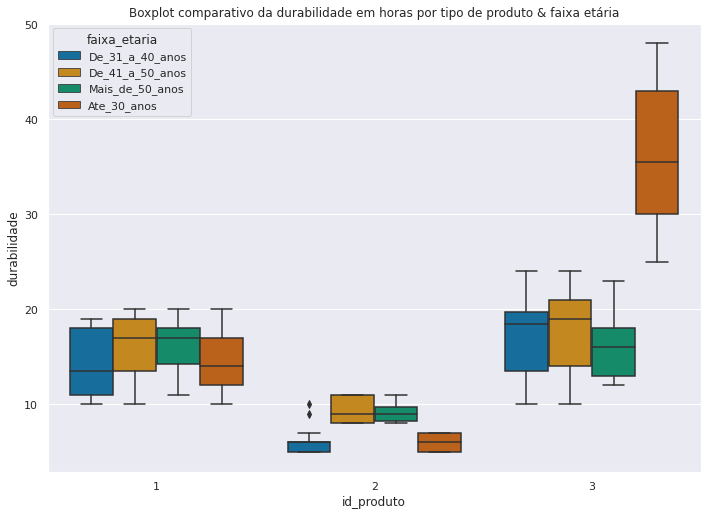

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="id_produto", y="durabilidade", hue = "faixa_etaria",data=df, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto & faixa etária")

Pelo gráfico acima, podemos perceber que:
- O Produto 1: Funciona melhor para mulheres acima dos 40 anos (mediana mais deslocada) e pior dos 31 a 40 anos
- O Produto 2: Funciona melhor para mulheres acima dos 40 anos, conforme já vimos no gráfico de dispersao
- O Produto 3: Funciona melhor para mulheres de é 30 anos.

**2.3 Teste de Hipóteses**: idade


---

Vamos agora realizar o Teste KS para a durabilidade de alguns produtos x faixa etária

1. Até 30 anos

In [38]:
durabilidade_1_Ate_30_anos = df[(df.id_produto == 1)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade
durabilidade_2_Ate_30_anos = df[(df.id_produto == 2)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade
durabilidade_3_Ate_30_anos = df[(df.id_produto == 3)&(df.faixa_etaria == 'Ate_30_anos')].durabilidade

In [39]:
print(ks_2samp(durabilidade_1_Ate_30_anos, durabilidade_2_Ate_30_anos))
print(ks_2samp(durabilidade_2_Ate_30_anos, durabilidade_3_Ate_30_anos))
print(ks_2samp(durabilidade_1_Ate_30_anos, durabilidade_3_Ate_30_anos))

KstestResult(statistic=1.0, pvalue=1.1254353546489764e-18, statistic_location=7, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=1.0121606088575607e-24, statistic_location=7, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=1.249230484985489e-25, statistic_location=20, statistic_sign=1)


Conclusao: As distribuicoes da durabilidade dos produtos sao estatisticamente diferentes Até 30 anos.

2. De 31 a 40 anos

In [40]:
durabilidade_1_De_31_a_40_anos = df[(df.id_produto == 1)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade
durabilidade_2_De_31_a_40_anos = df[(df.id_produto == 2)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade
durabilidade_3_De_31_a_40_anos = df[(df.id_produto == 3)&(df.faixa_etaria == 'De_31_a_40_anos')].durabilidade

In [41]:
print(ks_2samp(durabilidade_1_De_31_a_40_anos, durabilidade_2_De_31_a_40_anos))
print(ks_2samp(durabilidade_2_De_31_a_40_anos, durabilidade_3_De_31_a_40_anos))
print(ks_2samp(durabilidade_1_De_31_a_40_anos, durabilidade_3_De_31_a_40_anos))

KstestResult(statistic=0.9411764705882353, pvalue=1.5287787361003725e-09, statistic_location=9, statistic_sign=-1)
KstestResult(statistic=0.9411764705882353, pvalue=2.607782928149061e-06, statistic_location=9, statistic_sign=1)
KstestResult(statistic=0.4090909090909091, pvalue=0.15138596954624428, statistic_location=18, statistic_sign=1)


Conclusão: Para faixas etárias de 31 a 40 anos a distribuicao dos durabilidade da fórmula 1 e da fórmula 3 não difere com 95% de confiança. Ou seja para esse publico as duas formulacoes tem durabilidade semelhante

3. De_41_a_50_anos

In [42]:
durabilidade_1_De_41_a_50_anos = df[(df.id_produto == 1)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade
durabilidade_2_De_41_a_50_anos = df[(df.id_produto == 2)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade
durabilidade_3_De_41_a_50_anos = df[(df.id_produto == 3)&(df.faixa_etaria == 'De_41_a_50_anos')].durabilidade

In [43]:
print(ks_2samp(durabilidade_1_De_41_a_50_anos, durabilidade_2_De_41_a_50_anos))
print(ks_2samp(durabilidade_2_De_41_a_50_anos, durabilidade_3_De_41_a_50_anos))
print(ks_2samp(durabilidade_1_De_41_a_50_anos, durabilidade_3_De_41_a_50_anos))

KstestResult(statistic=0.8518518518518519, pvalue=8.705640422151236e-12, statistic_location=11, statistic_sign=-1)
KstestResult(statistic=0.9411764705882353, pvalue=2.7486162146846832e-11, statistic_location=11, statistic_sign=1)
KstestResult(statistic=0.4335511982570806, pvalue=0.025870030212349574, statistic_location=19, statistic_sign=1)


4. Mais_de_50_anos

In [44]:
durabilidade_1_Mais_de_50_anos = df[(df.id_produto == 1)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade
durabilidade_2_Mais_de_50_anos = df[(df.id_produto == 2)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade
durabilidade_3_Mais_de_50_anos = df[(df.id_produto == 3)&(df.faixa_etaria == 'Mais_de_50_anos')].durabilidade

In [45]:
print(ks_2samp(durabilidade_1_Mais_de_50_anos, durabilidade_2_Mais_de_50_anos))
print(ks_2samp(durabilidade_2_Mais_de_50_anos, durabilidade_3_Mais_de_50_anos))
print(ks_2samp(durabilidade_1_Mais_de_50_anos, durabilidade_3_Mais_de_50_anos))

KstestResult(statistic=0.9444444444444444, pvalue=7.933766012281933e-09, statistic_location=11, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=9.696825126122363e-09, statistic_location=11, statistic_sign=1)
KstestResult(statistic=0.1623931623931624, pvalue=0.9621595023492377, statistic_location=13, statistic_sign=-1)


Conclusão: Para faixas etárias acima de 50 anos a distribuicao dos durabilidade da fórmula 1 e da fórmula 3 não difere com 95% de confiança. Ou seja para esse publico as duas formulacoes tem durabilidade semelhante, assim como para as faixas etárias de 31 a 40 anos

## **Conclusao Final do Desafio**:


---

As formulações estudadas são bem diferentes, de modo que:

- O Produto 1, de modo geral apresenta durabilidade intermediária:
  - Analisando mais especificamente, essa durabilidade é mais acentuada nos grupos: acima dos 40 anos
  - Apresenta pior durabilidade quando ocorre a exposição ao sol.

- Produto 2: 
  - Apresenta uma durabilidade menor que os outros, mas possui maior consistência quando falamos sobre exposição ao sol. Sendo a durabilidade deste produto pouco afetada por tal fator.
  - Apresenta uma melhor durabilidade para faixas acima dos 40 anos
  - tem uma distribuicao muito diferente dos outros, podendo ser comercializado de forma/ para públicos diferentes.

- O Produto 3, apresenta maior durabilidade.
  - Analisando mais especificamente, essa durabilidade é mais acentuada nos grupos: de até 30 anos e sem exposição ao sol
  - A durabilidade deste produto decai bastante para faixas etárias de 31 a 40 anos e de 31 a 40 anos, sobretudo. tendo resultados muito semelhantes ao produto 1, conforme mostrado no teste KS.


Observação: O teste KS nesse caso tem o diferencial de analisar a distribuição como um todo do produto e não somente a média, portanto, tendo em vista esse benefício, optamos por traze-lo no gabarito da solução. Embora muitos outros testes, mais amplamente mencionados ao longo do curso, também fizessem sentido, como os testes paramétricos de diferenças de médias.


## **Desafio 2 : Alimentos**

**Contexto:**

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a  7,85 reais e desvio padrão igual a 3,32 reais.  Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados. 

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52. 



**1**: Você pode concluir que existe diferença de precos estatisticamente relevante com 5% de significancia?

**2**: Qual o valor da variável teste, o intervalo de confianca e o p-valor?


---

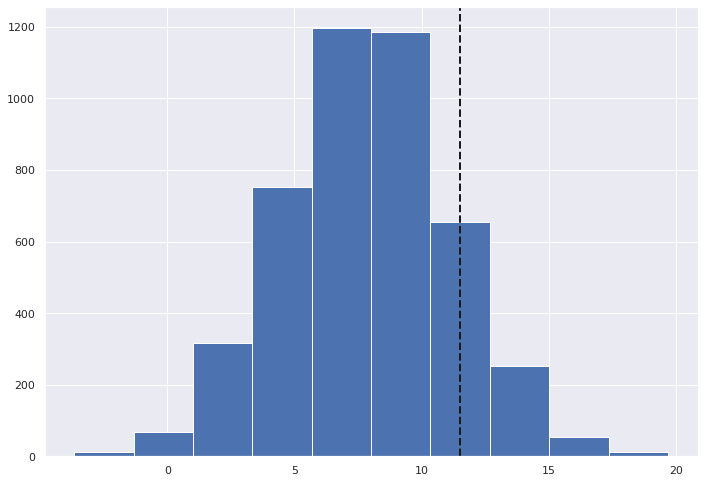

In [75]:
media = 7.85
desvp = 3.32
novopreco = 11.52
lojas = 45

import numpy as np 
import matplotlib.pyplot as plt 


values = np.random.normal(media, desvp, lojas) 
plt.hist(values, 10) 
plt.axvline(novop, color='k', linestyle='dashed', linewidth=2) 
plt.show() 

Acima temos o plot da distribuicao dos dados analisada e na linha tracejada o preço encontrado. Para responder a pergunta vamos calcular quao o preço do sorvete na calda superior da distribuiçao, a 95% de significancia estatística

In [ ]:
### definindo o teste
###H0: Média = 7,85 e não existe diferença de preço.
###HA: Média != 7,85 e existe diferença de preço .

In [76]:
media = 7.85
desvp = 3.32
novopreco = 11.52
lojas = 45

In [81]:

import scipy.stats as ss

### cálculo do valor crítico
alpha = 0.05
confiança = 1 - alpha
probabilidade = (0.5 + (confiança / 2)) ### o teste será bi-caudal
valor_critico = ss.norm.ppf(probabilidade) ## norm ppf calcula o valor critico da distribuicao do teste

### cálculo da estatistica de teste
z = (novopreco - media) / (desvp / np.sqrt(lojas))
print("estatística do teste : "+str(z))
### calculo do p-valor
pvalue = 2 * (ss.norm.sf(z))
print("p-valor : "+str(pvalue))

estatística do teste : 7.415394106106231
p-valor : 1.2126366281061861e-13


Conclusão: Aplicando o teste z, Com 95% de confiança, obtivemos o valor crítico 1.96, e estatística z de : 7.415. Com a estatística do teste calculalmos o p-valor e concluímos que existe diferença de preço entre as regiões mencionadas.